In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"lokeshprakashbelekar","key":"22c4db44d7cf1675b7c50699ecb70933"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d umairshahpirzada/birds-20-species-image-classification

 85% 59.0M/69.3M [00:00<00:00, 68.9MB/s]
100% 69.3M/69.3M [00:00<00:00, 84.6MB/s]


In [ ]:
!unzip birds-20-species-image-classification.zip

Archive:  birds-20-species-image-classification.zip
  inflating: images to predict/1.jpg  
  inflating: images to predict/2.jpg  
  inflating: images to predict/3.jpg  
  inflating: images to predict/4.jpg  
  inflating: images to predict/5.jpg  
  inflating: images to predict/6.jpg  
  inflating: test/ABBOTTS BABBLER/1.jpg  
  inflating: test/ABBOTTS BABBLER/2.jpg  
  inflating: test/ABBOTTS BABBLER/3.jpg  
  inflating: test/ABBOTTS BABBLER/4.jpg  
  inflating: test/ABBOTTS BABBLER/5.jpg  
  inflating: test/ABBOTTS BOOBY/1.jpg  
  inflating: test/ABBOTTS BOOBY/2.jpg  
  inflating: test/ABBOTTS BOOBY/3.jpg  
  inflating: test/ABBOTTS BOOBY/4.jpg  
  inflating: test/ABBOTTS BOOBY/5.jpg  
  inflating: test/ABYSSINIAN GROUND HORNBILL/1.jpg  
  inflating: test/ABYSSINIAN GROUND HORNBILL/2.jpg  
  inflating: test/ABYSSINIAN GROUND HORNBILL/3.jpg  
  inflating: test/ABYSSINIAN GROUND HORNBILL/4.jpg  
  inflating: test/ABYSSINIAN GROUND HORNBILL/5.jpg  
  inflating: test/AFRICAN CROWNED CRANE

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        (os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Imporitng Libraries

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Activation
from tensorflow.keras import models
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.utils import plot_model
import tensorflow as tf
from keras.models import load_model
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2


# ignore the warnings
import warnings
warnings.filterwarnings('ignore')

# Data Argumentation

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 3208 images belonging to 20 classes.


In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 100 images belonging to 20 classes.


In [ ]:
val_datagen = ImageDataGenerator(rescale = 1./255)
val_set = val_datagen.flow_from_directory('valid',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 100 images belonging to 20 classes.


# Creating Base VGG16 Model

In [ ]:
base_model = VGG16(weights="imagenet", include_top=False, input_shape=(224,224,3))
base_model.trainable = False

58889256/58889256 [==============================] - 0s 0us/step


# Adding Layers to Base Model

In [ ]:
flatten_layer = Flatten()
prediction_layer = Dense(20, activation='softmax')

In [ ]:
model = models.Sequential([
    base_model,
    flatten_layer,
    prediction_layer
])

In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

# Training Model

In [ ]:
history = model.fit(x = training_set, validation_data = test_set, epochs = 5)

Epoch 1/5
101/101 [==============================] - 1820s 18s/step - loss: 1.4140 - accuracy: 0.6016 - val_loss: 0.4080 - val_accuracy: 0.8600
Epoch 2/5
 39/101 [==========>...................] - ETA: 17:43 - loss: 0.5184 - accuracy: 0.8446

# Saving Model

In [ ]:
model.save('model.h5')
model = load_model('model.h5')

# Plotting Model Architecture

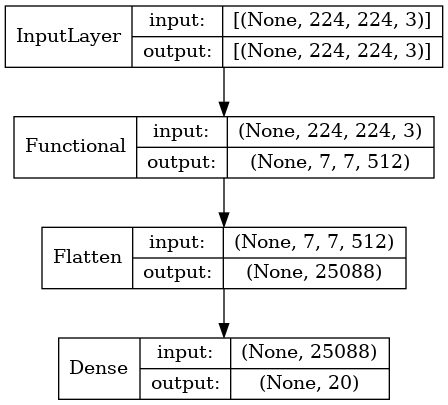

In [ ]:
plot_model(model, to_file='cnn_model.png', show_shapes=True, show_layer_names=False, rankdir='TB', expand_nested=False, dpi=96)
display(Image.open('cnn_model.png'))

# Accuracy

In [ ]:
_, acc = model.evaluate(val_set, verbose=1)
print('> %.3f' % (acc * 100.0))

4/4 [==============================] - 1s 156ms/step - loss: 0.3990 - accuracy: 0.9000
> 90.000


# Plot the loss

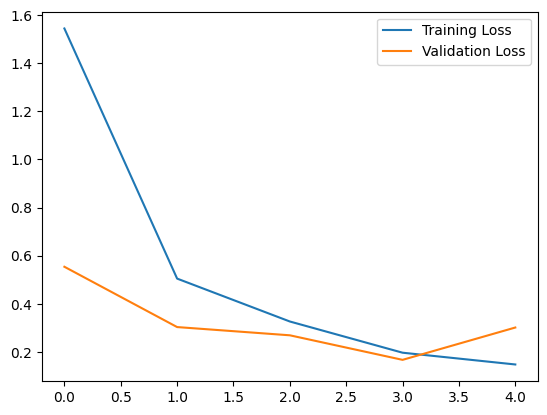

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

# Plot the loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# Plot the accuracy

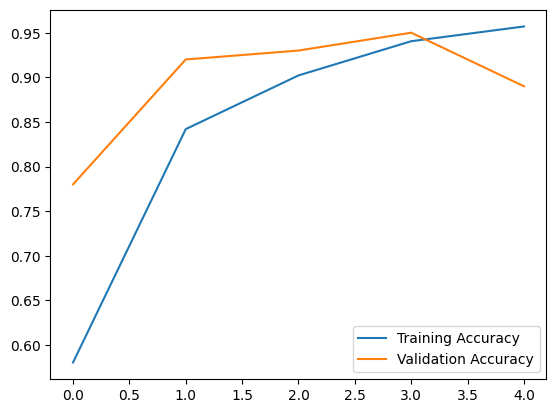

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
import numpy as np
import cv2
import os

# Path to the directory containing the image files
directory = "/kaggle/input/birds-20-species-image-classification/images to predict"

# List of image file extensions to load
image_extensions = ['.jpg', '.jpeg', '.png', '.bmp']

# List to store the loaded images
images = []

# Load the images from the directory
for filename in os.listdir(directory):
    # Check if the file is an image
    if any(extension in filename.lower() for extension in image_extensions):
        # Load the image
        img = cv2.imread(os.path.join(directory, filename))
        # Convert the image to grayscale if needed
        # img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        # Add the image to the list
        images.append(img)

# Convert the list of images to a NumPy array
images_array = np.array(images)

# Save the NumPy array to a file

# Prediction virtualization

1/1 [==============================] - 2s 2s/step


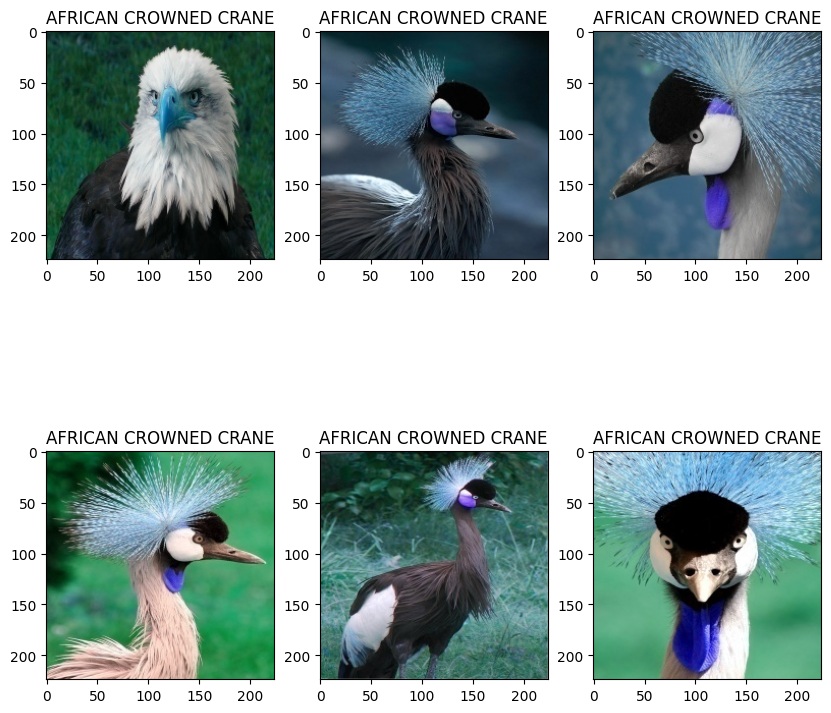

In [ ]:
import os
import numpy as np
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# Define the paths to the test and sample image folders and the model
test_dir = '/kaggle/input/birds-20-species-image-classification/test'
sample_dir = '/kaggle/input/birds-20-species-image-classification/images to predict'
model_path = '/kaggle/working/model.h5'

# Load the model
model = load_model(model_path)

# Get the list of class names from the test data folder
class_names = sorted(os.listdir(test_dir))

# Load the sample images
sample_images = images_array

# Make predictions
predictions = model.predict(sample_images)

# Calculate the number of rows and columns in the subplot grid
num_images = len(sample_images)
num_cols = 3
num_rows = num_images // num_cols
if num_images % num_cols != 0:
    num_rows += 1

# Create a subplot for each image and display the predicted class name as the title
fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(10, 10))
for i, ax in enumerate(axs.flat):
    if i < num_images:
        # Show the image
        ax.imshow(sample_images[i])
        # Find the index of the highest probability
        index = np.argmax(predictions[i])
        # Get the corresponding class name
        predicted_class = class_names[index]
        # Set the title of the subplot to the predicted class name
        ax.set_title(predicted_class)

# Display the plot
plt.show()